In [1]:
from google.colab import files
uploaded = files.upload()

Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data.xlsx


In [2]:
import pandas as pd
# Load Excel dataset
df = pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")
# Show first 5 rows
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
# Dataset info
df.info()
# Columns
print("Columns:", df.columns.tolist())
# Summary statistics
df.describe()
# Missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,0
id,0
NAME,270
host id,0
host_identity_verified,289
host name,408
neighbourhood group,29
neighbourhood,16
lat,8
long,8
country,532


In [4]:
print("Columns in dataset:")
print(df.columns.tolist())


Columns in dataset:
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


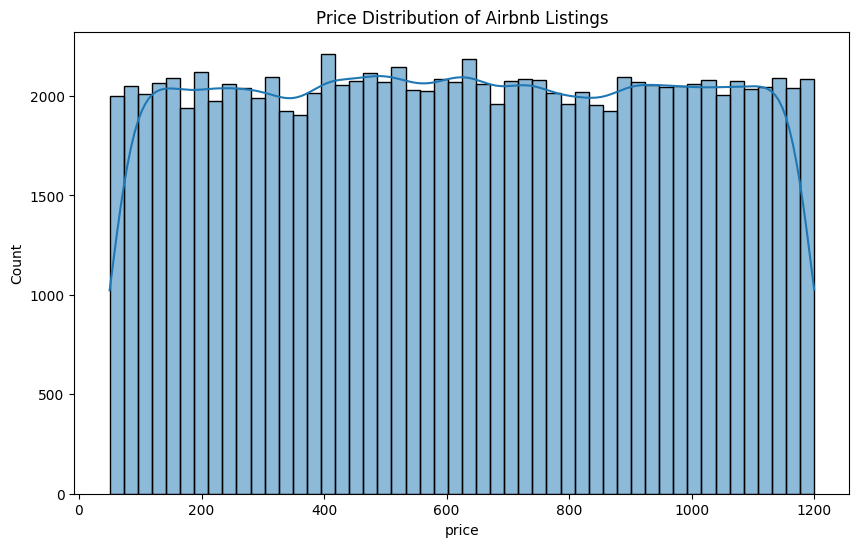

In [21]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Now your plotting code
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution of Airbnb Listings")
plt.show()


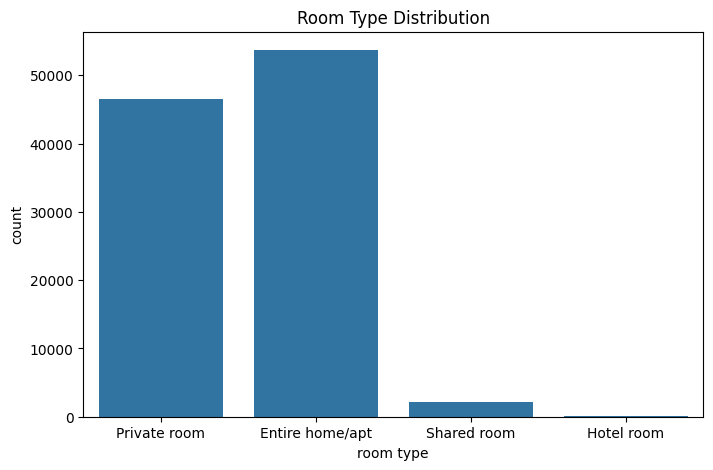

In [22]:
# Import libraries (only needed once per session)
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the room type distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room type')
plt.title("Room Type Distribution")
plt.show()


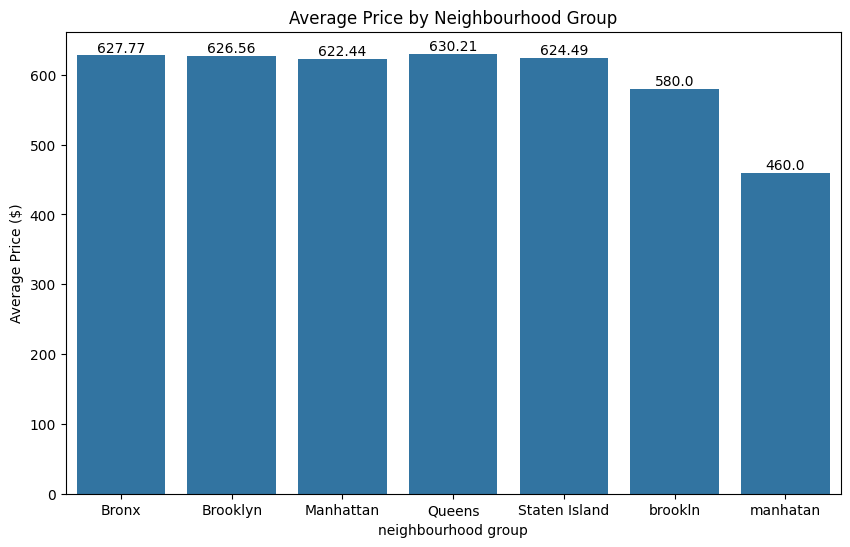

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate average price per neighbourhood group
avg_price = df.groupby('neighbourhood group')['price'].mean().reset_index()
# Plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(data=avg_price, x='neighbourhood group', y='price')
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price ($)")
# Add data labels on top of each bar
for index, row in avg_price.iterrows():
    barplot.text(index, row['price'] + 5, round(row['price'], 2), color='black', ha="center")
plt.show()


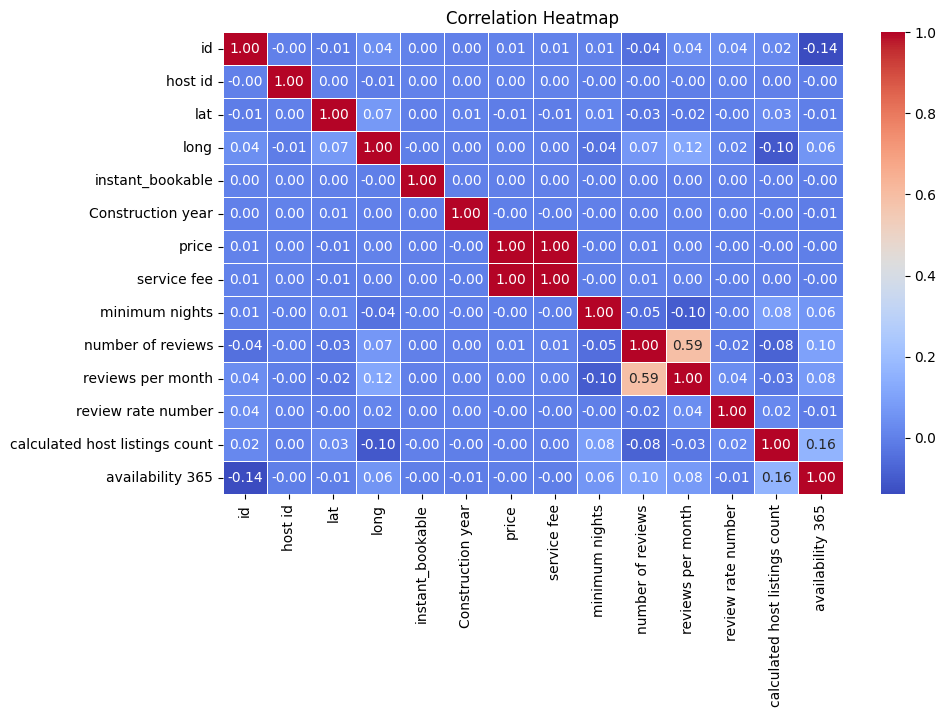

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-1449181299.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neigh.index, y=top_neigh.values, palette="viridis")


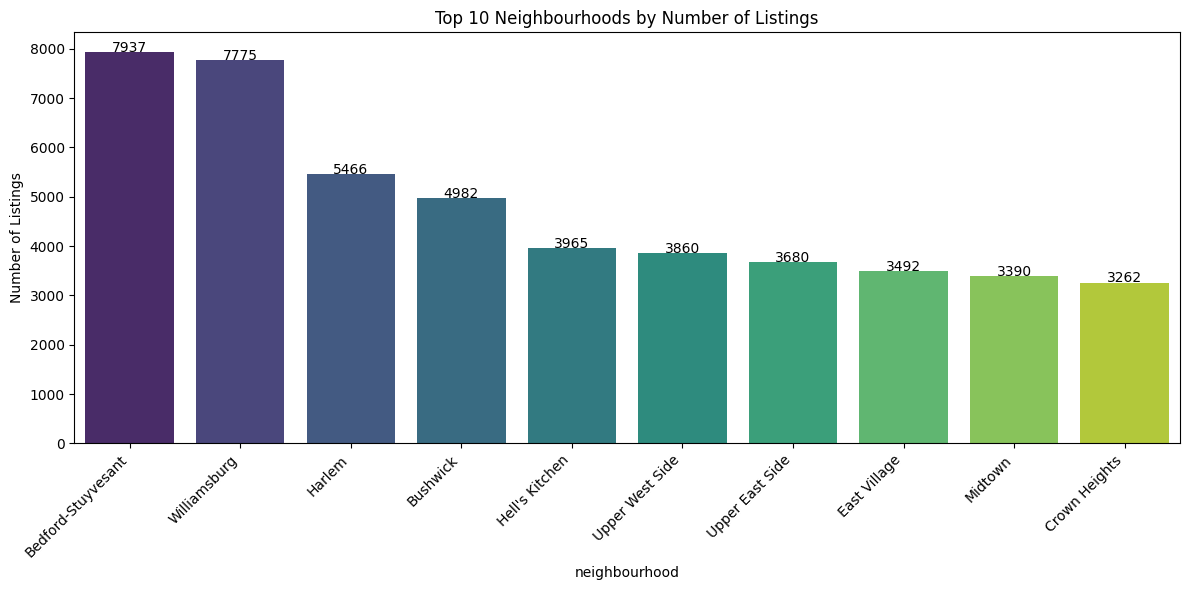

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Top 10 neighbourhoods by number of listings
top_neigh = df['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_neigh.index, y=top_neigh.values, palette="viridis")
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xticks(rotation=45, ha='right')  # Align labels better
plt.ylabel("Number of Listings")
# Add counts on top of bars
for i, value in enumerate(top_neigh.values):
    plt.text(i, value + 2, str(value), ha='center')
plt.tight_layout()  # Prevent label cutoff
plt.show()


/tmp/ipython-input-392782074.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='host_identity_verified', palette="Set2")


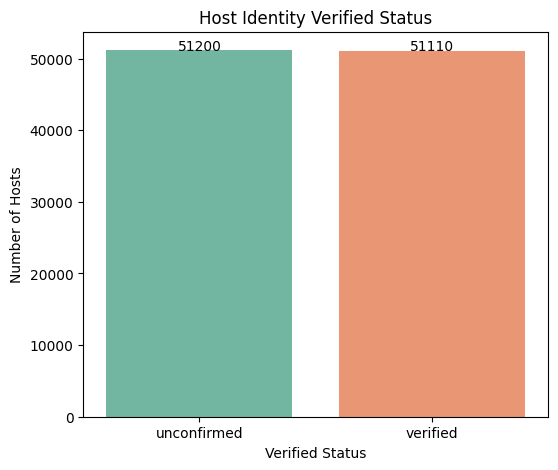

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='host_identity_verified', palette="Set2")
plt.title("Host Identity Verified Status")
plt.xlabel("Verified Status")
plt.ylabel("Number of Hosts")
# Optional: show counts on top of each bar
counts = df['host_identity_verified'].value_counts()
for i, value in enumerate(counts):
    plt.text(i, value + 2, value, ha='center')
plt.show()


/tmp/ipython-input-2614034592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=avg_price_room, x='room type', y='price', palette="magma")


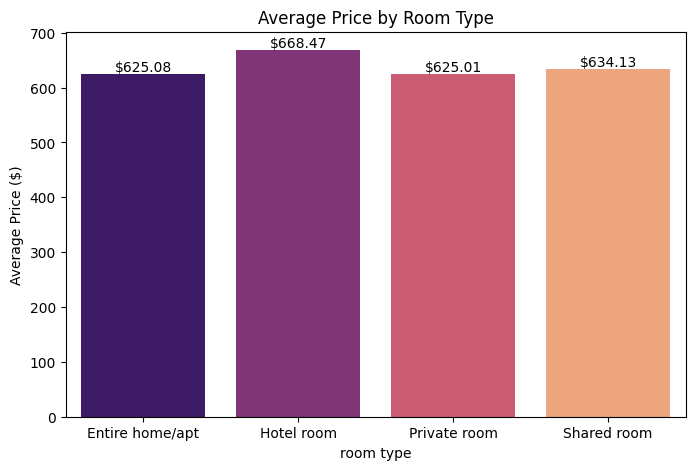

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate average price per room type
avg_price_room = df.groupby('room type')['price'].mean().reset_index()
plt.figure(figsize=(8,5))
barplot = sns.barplot(data=avg_price_room, x='room type', y='price', palette="magma")
plt.title("Average Price by Room Type")
plt.ylabel("Average Price ($)")
# Add value labels on top of bars
for index, row in avg_price_room.iterrows():
    barplot.text(index, row['price'] + 5, f"${row['price']:.2f}", ha='center')
plt.show()


/tmp/ipython-input-199645645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cancellation_policy', palette="Set3")


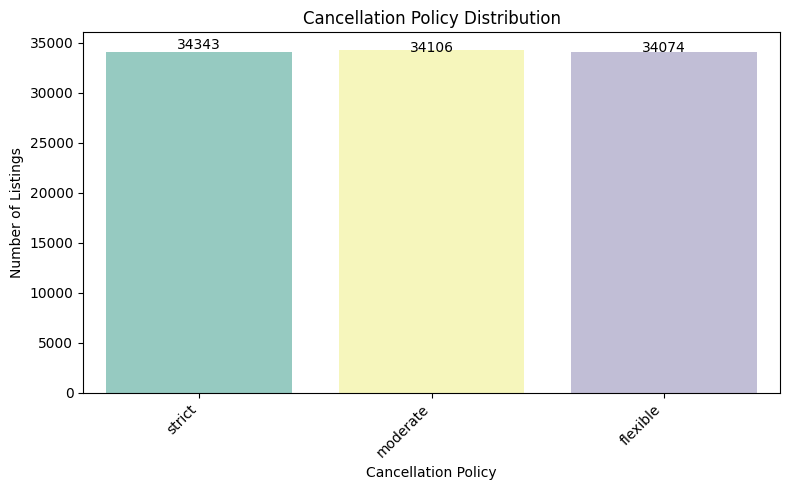

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cancellation_policy', palette="Set3")
plt.title("Cancellation Policy Distribution")
plt.xlabel("Cancellation Policy")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
# Optional: add counts on top of bars
counts = df['cancellation_policy'].value_counts()
for i, value in enumerate(counts):
    plt.text(i, value + 2, value, ha='center')
plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()


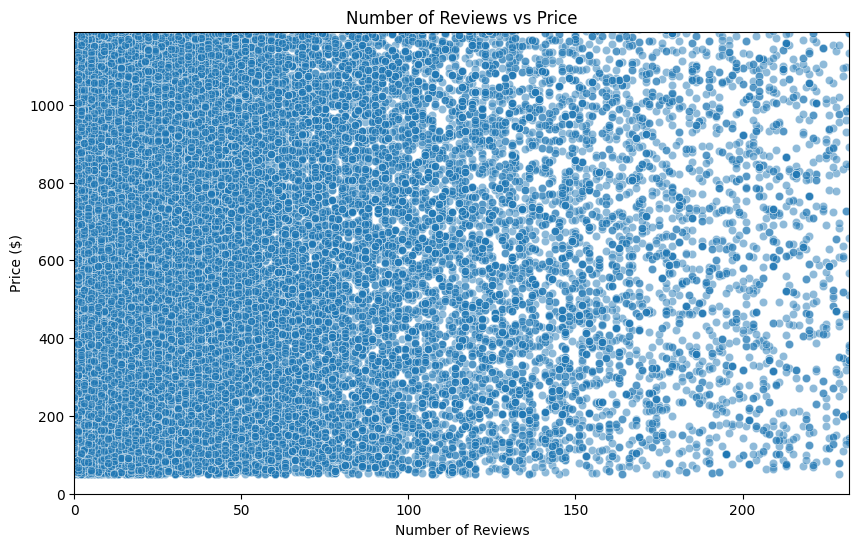

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='number of reviews', y='price', alpha=0.5)
plt.title("Number of Reviews vs Price")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
# Optional: limit extreme outliers for better visualization
plt.ylim(0, df['price'].quantile(0.99))
plt.xlim(0, df['number of reviews'].quantile(0.99))
plt.show()


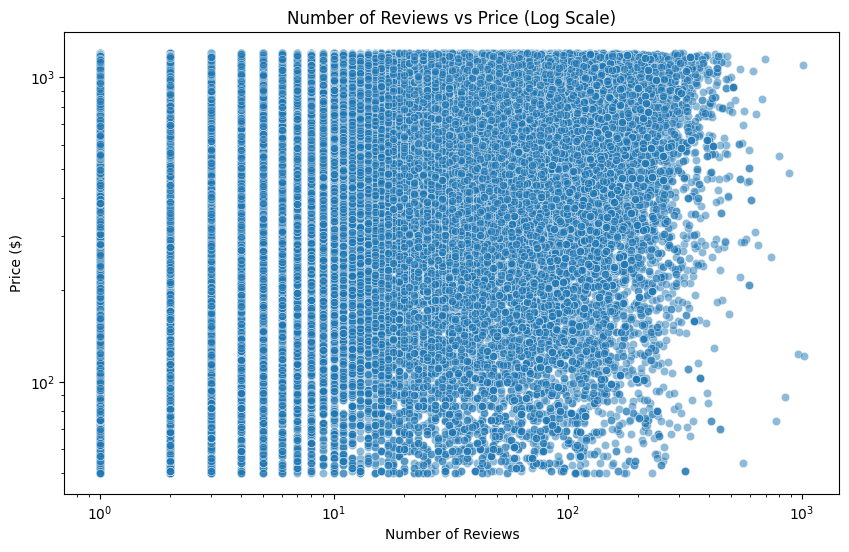

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='number of reviews',
    y='price',
    alpha=0.5
)
plt.title("Number of Reviews vs Price (Log Scale)")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.yscale('log')  # Log scale for price
plt.xscale('log')  # Optional: log scale for number of reviews if there are many zeros, you can add +1
plt.show()


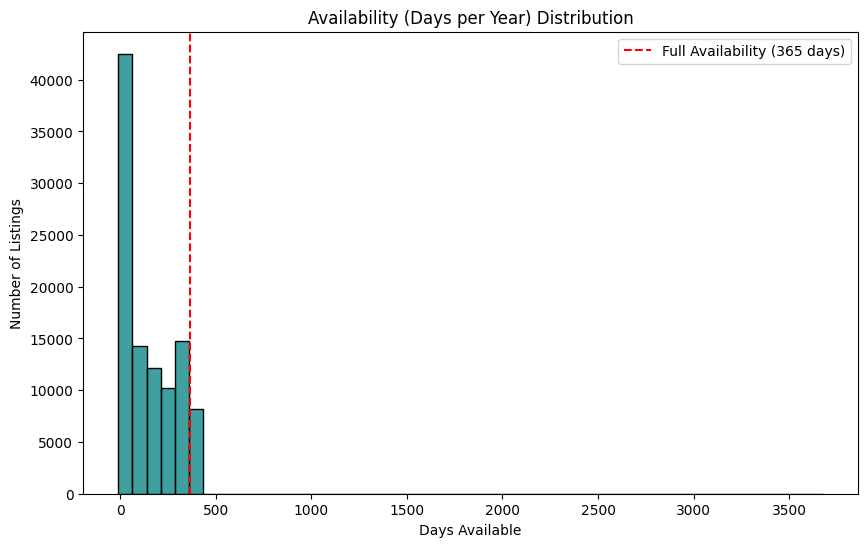

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['availability 365'], bins=50, kde=False, color='teal')
plt.title("Availability (Days per Year) Distribution")
plt.xlabel("Days Available")
plt.ylabel("Number of Listings")
# Optional: highlight listings with full availability
plt.axvline(x=365, color='red', linestyle='--', label='Full Availability (365 days)')
plt.legend()
plt.show()
